## Теория вероятностей и математическая статистика
****************

In [15]:
from math import factorial as f
from math import e, sqrt

%matplotlib inline
import numpy as np
from math import sin
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import asin,sin, cos, tan, exp, e, log, sqrt, pi
import math

$P_n=C_n^kp^kq^{n-k}$

##### 1. Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.


In [4]:
def Binomial(n,p,k):
    C_n_k = f(n)/(f(k)*f(n-k))
    return C_n_k * p**k * (1-p)**(n-k)    

In [30]:
Binomial(100,0.8,85)

0.048061793700746355

In [43]:
print(f'Мат ожидание M(X): {100*0.8}')
print(f'Дисперсия D(X): {100*0.8*0.2}')
print(f'Среднеквадратичное отклонение: {sqrt(100*0.8*0.2)}')

Мат ожидание M(X): 80.0
Дисперсия D(X): 16.0
Среднеквадратичное отклонение: 4.0


##### 2. Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день? Какова вероятность, что перегорят ровно две?


In [44]:
def Puasson(n,p,m):
    l = n * p   
    return (l**m)/(f(m))*e**(-l)

In [45]:
# Используем формулу Пуассона
print(f'Вероятность, что перегорит 0 ламп: {Puasson(5000,0.0004,0)}')
print(f'Вероятность, что перегорит 2 лампы: {Puasson(5000,0.0004,2)}')

Вероятность, что перегорит 0 ламп: 0.1353352832366127
Вероятность, что перегорит 2 лампы: 0.2706705664732254


##### 3. Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?

In [33]:
Binomial(144,0.5,70)

0.06281178035144776

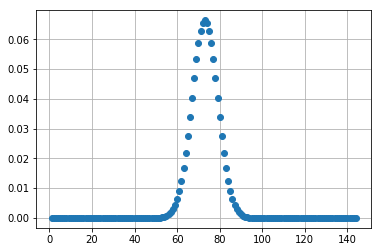

In [36]:
x = np.arange(1,145)
P_x = []
for i in range (len(x)):
    P_x.append(Binomial(144,0.5,i))

plt.plot(x,P_x, 'o')
plt.grid(True)
plt.show()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144])

##### 4. В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. Какова вероятность того, что все мячи белые? Какова вероятность того, что ровно два мяча белые? Какова вероятность того, что хотя бы один мяч белый?

In [68]:
# Вероятность того, что все 4 мяча - белые
7/10 * 6/9 * 9/11 * 8/10 

0.3054545454545454

In [81]:
# Решение через Биномиальное уравнение:
Binomial(2,7/10,2) * Binomial(2,9/11,2)

0.32801652892561983

In [10]:
# Вероятность того, что ровно 2 мяча - белые
C1 = 3/10 * 2/9 * 9/11 * 8/10 # Вариант: 0 белых (1 ящик) 2 белых (2 ящик) 
C2 = (3/10 * 7/9 + 7/10 * 3/9) * (2/11 * 9/10 + 9/11 * 2/10) # Вариант: 1 белый (1 ящик) 1 белый (2 ящик) 
C3 =  7/10 * 6/9 * 2/11 * 1/10 # Вариант: 2 белых (1 ящик) 0 белых (2 ящик) 
P1 = C1 + C2 + C3
P1

0.20484848484848484

In [14]:
# Вероятность того, что ровно 2 мяча - белые
# Решение через Биномиальное уравнение:
C1 = Binomial(2,7/10,0) * Binomial(2,9/11,2) # Вариант: 0 белых (1 ящик) 2 белых (2 ящик) 
C2 = Binomial(2,7/10,1) * Binomial(2,9/11,1) # Вариант: 1 белый (1 ящик) 1 белый (2 ящик) 
C3 = Binomial(2,7/10,2) * Binomial(2,9/11,0) # Вариант: 2 белых (1 ящик) 0 белых (2 ящик) 
P2 = C1 + C2 + C3
P2

0.20140495867768596

In [13]:
# Вероятность того, что хотя бы 1 мяч - белый:
C1 = (Binomial(2,7/10,0) * Binomial(2,9/11,1)) + (Binomial(2,7/10,1) * Binomial(2,9/11,0)) # Вариант: 1 белый (1:0 или 0:1)
C2 = P2 # Вариант: 2 белых (0:2 или 1:1 или 2:0)
C3 = (Binomial(2,7/10,2) * Binomial(2,9/11,1)) + (Binomial(2,7/10,1) * Binomial(2,9/11,2)) # Вариант: 3 белых (2:1 или 1:2)
C4 = Binomial(2,7/10,2) * Binomial(2,9/11,2) # Вариант: 4 белых (2:2)
P3 = C1 + C2 + C3 + C4
P3

0.9970247933884298